# COURSE: Master math by coding in Python
## SECTION: Probability theory

#### https://www.udemy.com/course/math-with-python/?couponCode=MXC-DISC4ALL
#### INSTRUCTOR: sincxpress.com

Note about this code: Each video in this section of the course corresponds to a section of code below. Please note that this code roughly matches the code shown in the live recording, but is not exactly the same -- the variable names, order of lines, and parameters may be slightly different. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# VIDEO: Histograms and probability densities

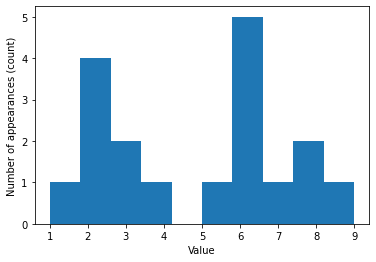

(array([1, 4, 2, 1, 1, 5, 1, 2, 1]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))


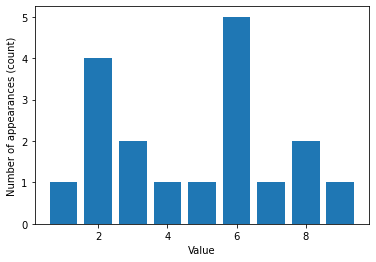

In [2]:
data = [1,2,2,2,2,3,4,5,6,6,6,6,7,8,9,8,6,3]

plt.hist(data)
plt.xlabel('Value')
plt.ylabel('Number of appearances (count)')
plt.show()

# with outputs
histdata = np.histogram(data,bins=np.arange(1,11))
print(histdata)
plt.bar(histdata[1][:-1],histdata[0])
plt.xlabel('Value')
plt.ylabel('Number of appearances (count)')
plt.show()


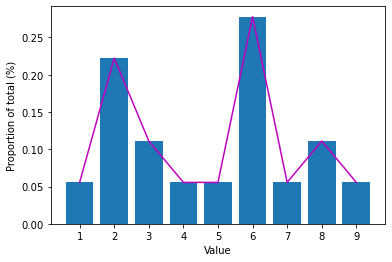

In [6]:
# convert to probability
x = histdata[1][:-1]
y = histdata[0]
yP = y/np.sum(y)

plt.bar(x,yP)
plt.plot(x,yP,'m')
plt.xlabel('Value')
plt.xticks(np.arange(1,10))
plt.ylabel('Proportion of total (%)')
plt.show()

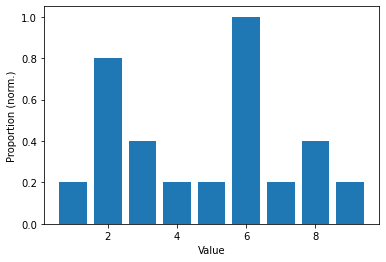

In [5]:
# another option: normalize to max=1 (not a probability distribution, but often useful)
yN = y/np.max(y)

plt.bar(x,yN)
plt.xlabel('Value')
plt.ylabel('Proportion (norm.)')
plt.show()

### Exercise

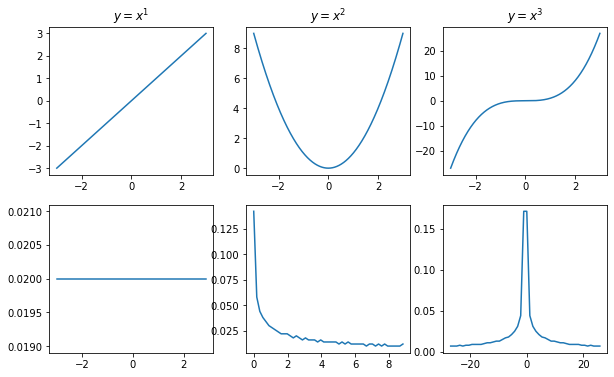

In [9]:
# pdensities of x, x^2, and x^3
x = np.linspace(-3,3,1000)

fig,ax = plt.subplots(2,3)
fig.set_size_inches(10,6) # width, height in inches

for i in range(3):
    
    # histogram of the function
    y = x**(i+1)
    hd = np.histogram(y,50)
    yp = hd[0] / sum(hd[0])
    
    # plot the function
    ax[0,i].plot(x,y)
    ax[0,i].set_title('$y=x^{%g}$' %(i+1))
    
    # plot its distribution
    ax[1,i].plot(hd[1][:-1],yp)
    
    
plt.show()

# VIDEO: Virtual coin tosses

In [2]:
import numpy as np
import matplotlib.pyplot as plt

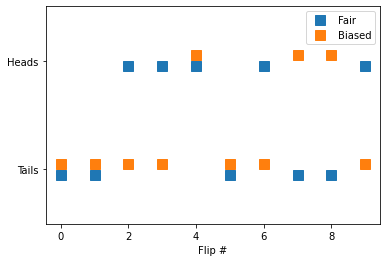

In [3]:
# p(heads), which one is weighted?

faircoin = .5
biascoin = .6

nTrials = 10

# initialize
results = np.zeros((2,nTrials))

for i in range(nTrials):
    results[0,i] = np.random.rand()>faircoin
    results[1,i] = np.random.rand()>biascoin
    

plt.plot(results[0,:]-.05,'s',markersize=10)
plt.plot(results[1,:]+.05,'s',markersize=10)
plt.yticks([0,1],['Tails','Heads'])
plt.xlabel('Flip #')
plt.ylim([-.5,1.5])
plt.legend(['Fair','Biased'])
plt.show()

In [4]:
import pandas as pd
df = pd.DataFrame(results,dtype='int',index=['fair','biased'])
df

,0,1,2,3,4,5,6,7,8,9
fair,0,0,1,1,1,0,1,0,0,1
biased,0,0,0,0,1,0,0,1,1,0


In [9]:
df['Ave.'] = df.mean(axis=1)
df

,0,1,2,3,4,5,6,7,8,9,Ave.
fair,0,0,1,1,1,0,1,0,0,1,0.5
biased,0,0,0,0,1,0,0,1,1,0,0.3


### Exercise

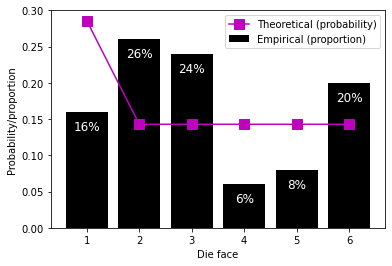

In [11]:
# weighted die. 2-6 have equal probability, 1 has twice probability as any other flip. make histogram after 50 rolls

n = 50

outcomes = np.zeros(6)

pureprobs = np.array([2,1,1,1,1,1])
pureprobs = pureprobs/np.sum(pureprobs)

for i in range(n):
    
    # roll 7-sided die
    dieroll = np.random.randint(0,7)
    
    # impose bias
    if dieroll==6:
        dieroll=0
    
    # increment the outcome
    outcomes[dieroll] += 1

plt.bar(range(1,7),outcomes/n,color='k',label='Empirical (proportion)')
plt.plot(range(1,7),pureprobs,'ms-',markersize=10,label='Theoretical (probability)')
plt.xlabel('Die face')
plt.ylabel('Probability/proportion')

for i in range(1,7):
    plt.text(i,outcomes[i-1]/n-.025, '%s%%' %int(100*np.round(outcomes[i-1]/n,2)),\
             fontsize=12,horizontalalignment='center',color='w')

plt.legend()
plt.show()


# VIDEO: Building distributions from random numbers

Mean of 5.01305, std of 1.96346


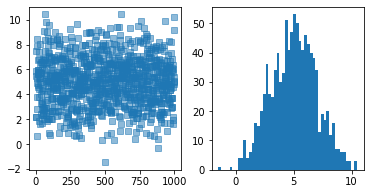

In [13]:
# review of normal distribution

shift = 5
stretch = 2
n = 1000

pnts = np.random.randn(n)*stretch + shift
print('Mean of %g, std of %g' %(np.mean(pnts),np.std(pnts)))

fig,ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot(pnts,'s',alpha=.5)
ax[1].hist(pnts,50)

plt.show()

Mean of 4.98179, range of 1.99766


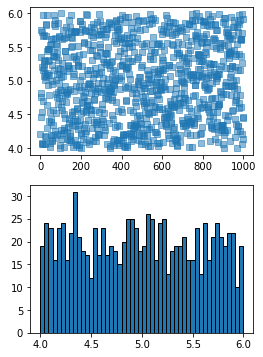

In [15]:
# review of uniform distribution

shift = 5
stretch = 2
n = 1000

pnts = np.random.rand(n)*stretch + shift-.5*stretch
print('Mean of %g, range of %g' %(np.mean(pnts),np.max(pnts)-np.min(pnts)))

fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(pnts,'s',alpha=.5)
# ax[1].hist(pnts,bins=[4,4.1,5.2,5.5,6],edgecolor='k')
ax[1].hist(pnts,bins=50,edgecolor='k')

plt.show()

Mean of 3.223, variance of 3.45727


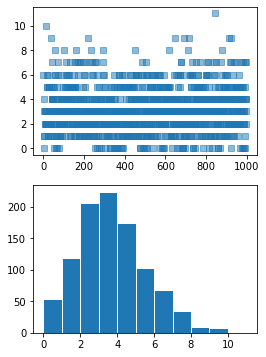

In [16]:
# Poisson distribution
lam = 3.4

pnts = np.random.poisson(lam,n)
print('Mean of %g, variance of %g' %(np.mean(pnts),np.var(pnts)))

fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(pnts,'s',alpha=.5)
ax[1].hist(pnts,bins=np.arange(0,np.max(pnts)+1),edgecolor='w')

plt.show()

Mean of 3.39054, variance of 26.3373


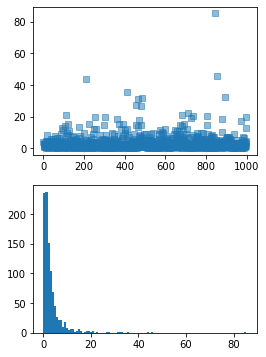

In [17]:
stretch = 1
shift = np.log(2)

pnts = np.random.lognormal(shift,stretch,n)
print('Mean of %g, variance of %g' %(np.mean(pnts),np.var(pnts)))

fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(pnts,'s',alpha=.5)
ax[1].hist(pnts,100)

plt.show()

### Exercise

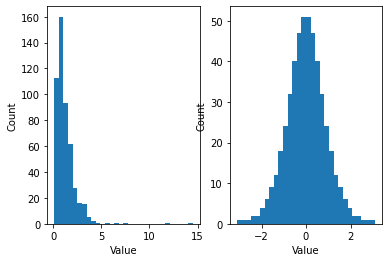

In [18]:
# transform any distribution into Gaussian
from scipy.stats import rankdata

n = 500

orig_data  = 2**np.random.randn(n)

# rank transform
trans_data = rankdata( orig_data )

# add a data point to the top
trans_data = np.append(trans_data,np.max(trans_data)+1)

trans_data = 2*(trans_data/np.max(trans_data))-1
trans_data = np.delete(trans_data,n)

trans_data = np.arctanh( trans_data )


fig,ax = plt.subplots(1,2)

ax[0].hist(orig_data,30)
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Count')

ax[1].hist(trans_data,30)
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Count')

plt.show()

# VIDEO: The central limit theorem

### Exercise

# VIDEO: Joint probability distributions 

### Exercise

# VIDEO: Probability BUG HUNT!